In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_PATH = r'C:\Users\KDP-14\Desktop\VSCode\KDT6\기업 프로젝트\Dataset\팀원 데이터2\clean_data2.csv'
dataDF = pd.read_csv(DATA_PATH)

In [3]:
dataDF

,c_temp_pv,k_rpm_pv,n_temp_pv,scale_pv,s_temp_pv
0,69.6,189,67.2,3.01,67.1
1,69.8,189,67.2,3.01,67.0
2,69.7,189,67.9,3.08,65.9
3,69.7,189,67.8,3.08,65.9
4,69.7,189,67.8,3.08,65.9
...,...,...,...,...,...
232022,69.7,191,67.6,0.00,67.3
232023,69.8,191,67.5,0.00,67.0
232024,69.7,191,67.4,0.00,66.8
232025,69.7,191,67.3,0.00,66.7


In [4]:
dataDF = dataDF[(dataDF['scale_pv'] >= 2.9) & (dataDF['scale_pv'] <= 3.1)]
dataDF = dataDF[(dataDF['k_rpm_pv'] >= 170) & (dataDF['k_rpm_pv'] <= 200)]

In [ ]:
dataDF

,c_temp_pv,k_rpm_pv,n_temp_pv,scale_pv,s_temp_pv
0,69.6,189,67.2,3.01,67.1
1,69.8,189,67.2,3.01,67.0
2,69.7,189,67.9,3.08,65.9
3,69.7,189,67.8,3.08,65.9
4,69.7,189,67.8,3.08,65.9
...,...,...,...,...,...
231972,69.8,191,66.5,3.05,66.2
231973,69.8,191,66.4,3.05,66.0
231974,69.8,191,66.4,3.05,66.1
231989,69.8,191,66.8,3.09,66.6


In [35]:
# rpm별로 scale의 범위 확인
rpm_170_180 = dataDF[(dataDF['k_rpm_pv']>=170) & (dataDF['k_rpm_pv']<180)]
rpm_180_190 = dataDF[(dataDF['k_rpm_pv']>=180) & (dataDF['k_rpm_pv']<190)]
rpm_190_up = dataDF[(dataDF['k_rpm_pv']>=190)]

In [43]:
def drawing(data):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    # 박스플롯
    sns.boxplot(data=data['scale_pv'], ax=axes[0], color="skyblue")
    axes[0].set_title("Boxplot")

    # 히스토그램
    sns.histplot(data['scale_pv'], ax=axes[1], kde=True, color="lightcoral")
    axes[1].set_title("Histogram")

    # 그래프 간격 조정
    plt.tight_layout()
    plt.show()

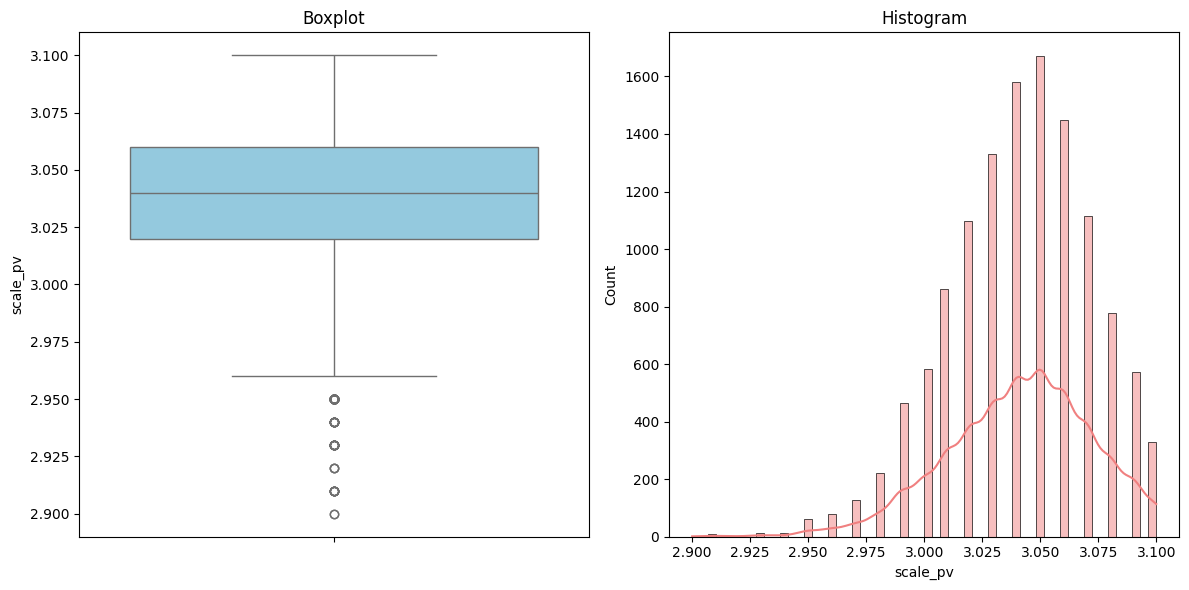

In [44]:
drawing(rpm_170_180)

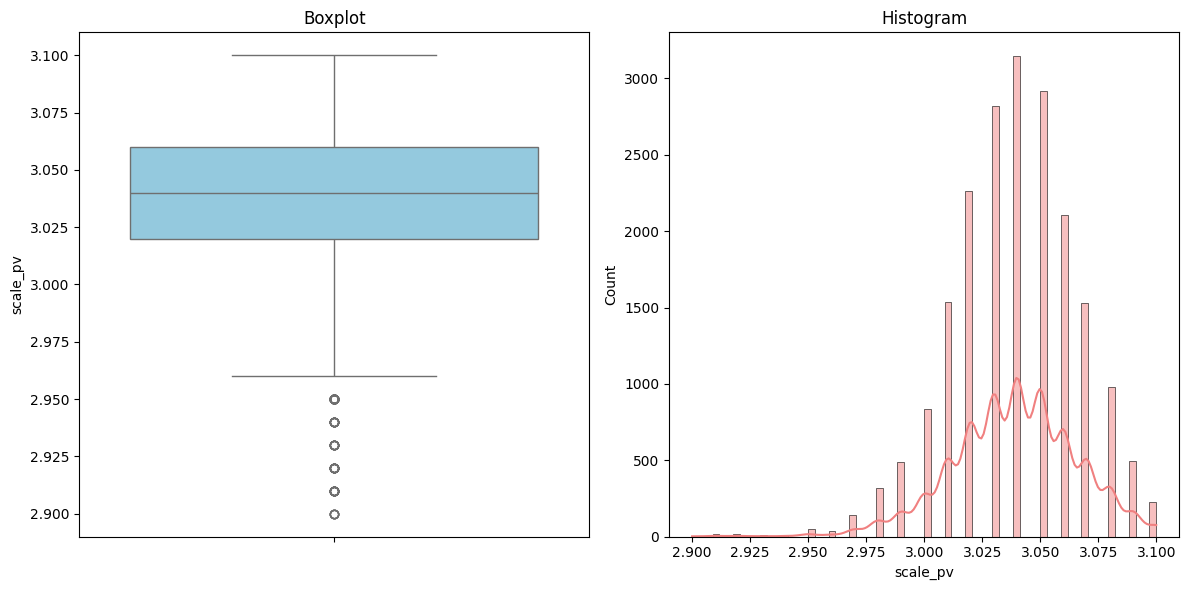

In [45]:
drawing(rpm_180_190)

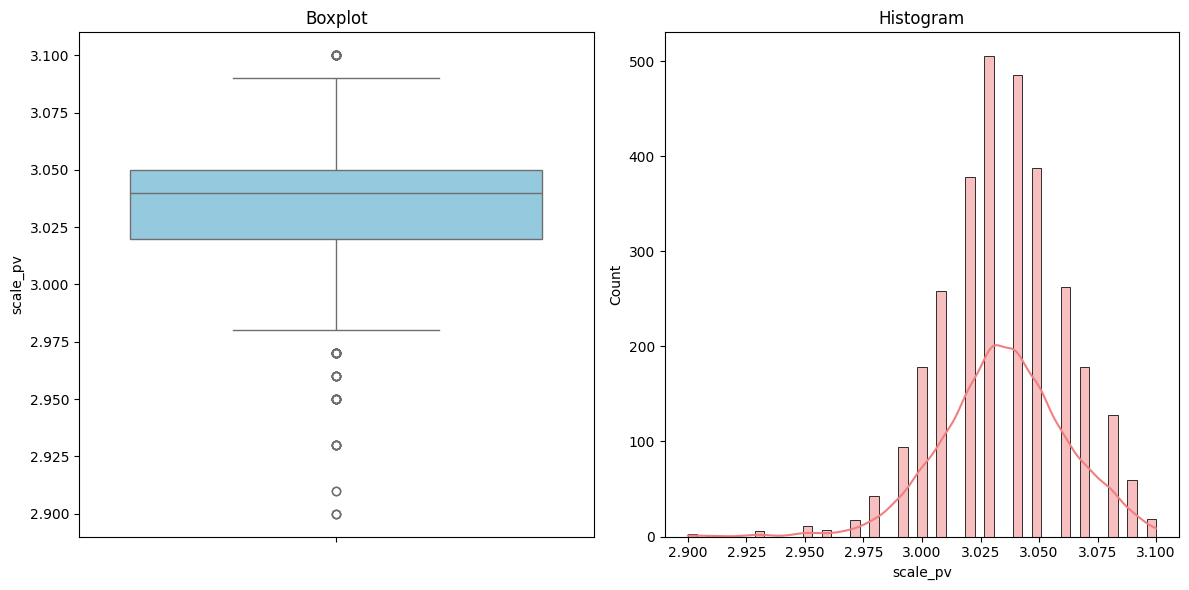

In [46]:
drawing(rpm_190_up)

{'whiskers': [<matplotlib.lines.Line2D at 0x21032fae670>,
 'caps': [<matplotlib.lines.Line2D at 0x21032faebb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21032fae3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x21032fbd130>],
 'fliers': [<matplotlib.lines.Line2D at 0x21032fbd3d0>],
 'means': []}

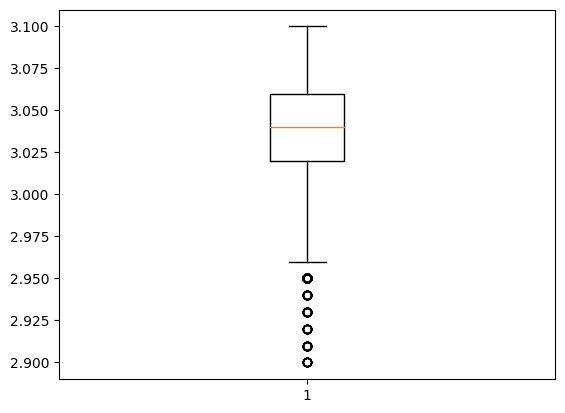

In [21]:
plt.boxplot(dataDF['scale_pv'])

{'whiskers': [<matplotlib.lines.Line2D at 0x210355397c0>,
 'caps': [<matplotlib.lines.Line2D at 0x21035539d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x21035539520>],
 'medians': [<matplotlib.lines.Line2D at 0x21035546280>],
 'fliers': [<matplotlib.lines.Line2D at 0x21035546520>],
 'means': []}

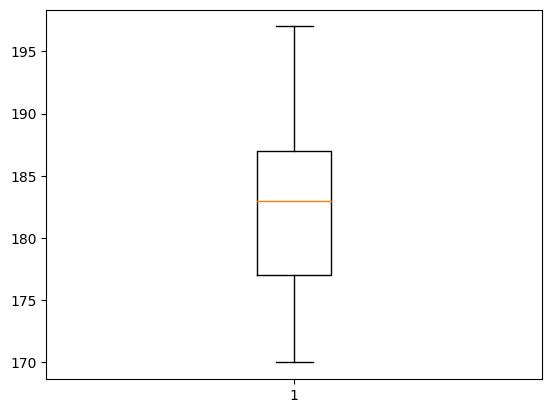

In [22]:
plt.boxplot(dataDF['k_rpm_pv'])

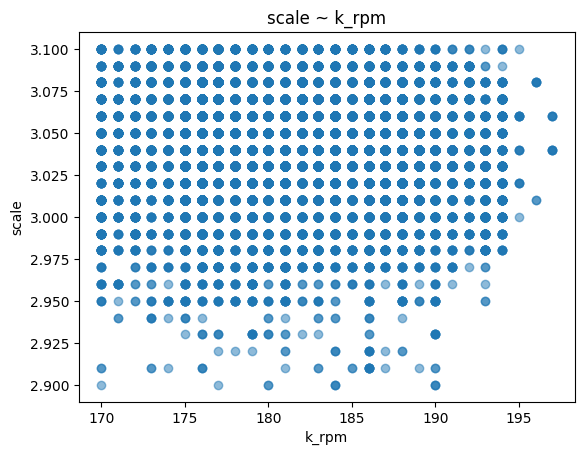

In [6]:
Y = dataDF['scale_pv'].values
X = dataDF['k_rpm_pv'].values

plt.scatter(X, Y, alpha=0.5)
plt.title('scale ~ k_rpm')
plt.xlabel('k_rpm')
plt.ylabel('scale')
plt.show()

In [7]:
dataDF.corr()

,c_temp_pv,k_rpm_pv,n_temp_pv,scale_pv,s_temp_pv
c_temp_pv,1.000000,-0.087153,0.286607,-0.005216,0.147842
k_rpm_pv,-0.087153,1.000000,-0.049049,-0.068226,-0.049544
n_temp_pv,0.286607,-0.049049,1.000000,0.088858,0.527040
scale_pv,-0.005216,-0.068226,0.088858,1.000000,-0.000972
s_temp_pv,0.147842,-0.049544,0.527040,-0.000972,1.000000


In [8]:
from scipy.stats import ttest_rel
ttest_rel(X,Y)

TtestResult(statistic=6026.815944041903, pvalue=0.0, df=35314)

## train_test data 나누기

In [14]:
feature = dataDF[['scale_pv']]
target = dataDF[['k_rpm_pv']]
Sc_feature =  np.exp(dataDF[['scale_pv']])
Sc_target = np.exp(dataDF['k_rpm_pv'])

In [18]:
from sklearn.preprocessing import RobustScaler
standardScaler = RobustScaler().fit(feature)
feature_Rb = standardScaler.transform(feature)
standardScaler = RobustScaler().fit(target)
target_Rb = standardScaler.transform(target)

In [19]:
Sc_feature

,scale_pv
0,20.287400
1,20.287400
2,21.758402
3,21.758402
4,21.758402
...,...
231972,21.115344
231973,21.115344
231974,21.115344
231989,21.977078


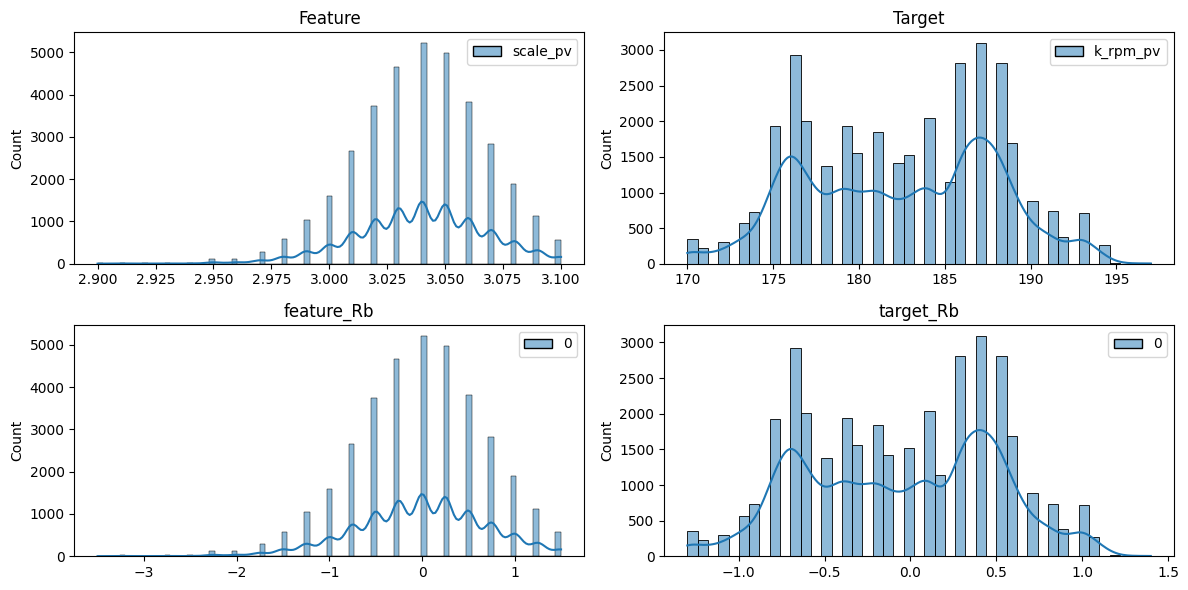

In [20]:


fig, axes = plt.subplots(2, 2, figsize=(12, 6))

sns.histplot(feature, ax=axes[0, 0], kde=True, color="lightcoral")
axes[0, 0].set_title("Feature")

sns.histplot(target, ax=axes[0, 1], kde=True, color="lightcoral")
axes[0, 1].set_title("Target")

sns.histplot(feature_Rb, ax=axes[1, 0], kde=True, color="lightcoral")
axes[1, 0].set_title("feature_Rb")

sns.histplot(target_Rb, ax=axes[1, 1], kde=True, color="lightcoral")
axes[1, 1].set_title("target_Rb")

# 그래프 간격 조정
plt.tight_layout()
plt.show()

(array([   35.,    46.,   142.,   412.,  1625.,  4251.,  8394., 10189.,
         6639.,  3582.]),
 array([2.9 , 2.92, 2.94, 2.96, 2.98, 3.  , 3.02, 3.04, 3.06, 3.08, 3.1 ]),
 <BarContainer object of 10 artists>)

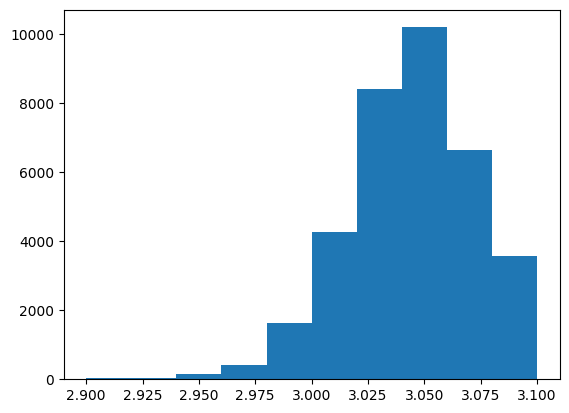

In [64]:
plt.hist(feature)

(array([ 877., 3231., 6312., 3494., 4786., 6002., 5905., 3308., 1367.,
          33.]),
 array([170. , 172.7, 175.4, 178.1, 180.8, 183.5, 186.2, 188.9, 191.6,
        194.3, 197. ]),
 <BarContainer object of 10 artists>)

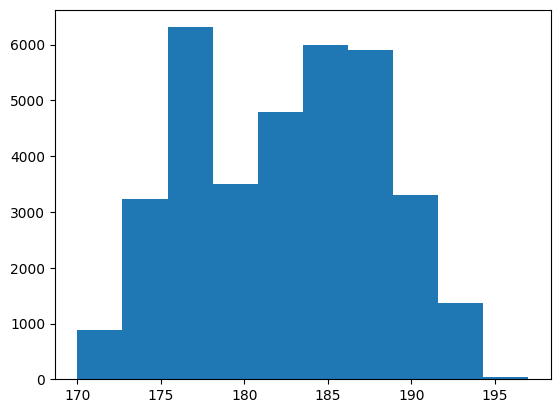

In [62]:
plt.hist(target)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature,target, test_size= 0.2, random_state=77)

In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [41]:
model.fit(X_train,y_train)

LinearRegression()

In [42]:
print(f'테스트 결정계수 : {model.score(X_test,y_test)}')

테스트 결정계수 : 0.0031260472312165666


In [43]:
import joblib

# 모델 저장
joblib.dump(model, 'linear_model.pkl')  # 모델을 .pkl 파일로 저장

['linear_model.pkl']

In [44]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,r2_score
loaded_model=joblib.load('linear_model.pkl')

# 로드한 모델로 예측
y_pred = loaded_model.predict(X_test)

y_pred = loaded_model.predict(X_test)
MAE = mean_absolute_error(y_test,y_pred)
MAPE = mean_absolute_percentage_error(y_test,y_pred)
Score = loaded_model.score(X_test,y_test)
print(f'MAE => {MAE}     MAPE => {MAPE*100}    R2 => {Score}')

MAE => 4.820997571475542     MAPE => 2.650140386397096    R2 => 0.0031260472312165666


In [45]:
loaded_model.coef_
# c_temp_pv		n_temp_pv	scale_pv	s_temp_pv

array([-13.92067142])

In [47]:
loaded_model.intercept_

224.75532214988388

In [24]:
dataDF.corr()

,c_temp_pv,k_rpm_pv,n_temp_pv,scale_pv,s_temp_pv
c_temp_pv,1.000000,-0.087153,0.286607,-0.005216,0.147842
k_rpm_pv,-0.087153,1.000000,-0.049049,-0.068226,-0.049544
n_temp_pv,0.286607,-0.049049,1.000000,0.088858,0.527040
scale_pv,-0.005216,-0.068226,0.088858,1.000000,-0.000972
s_temp_pv,0.147842,-0.049544,0.527040,-0.000972,1.000000


In [29]:
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = dataDF.drop('k_rpm_pv',axis=1).copy()
y = dataDF['k_rpm_pv']

X_trainDF, X_validDF, y_trainSR, y_validSR = train_test_split(X, y, random_state=2024, train_size=0.8)
print(X_trainDF.shape, X_validDF.shape, y_trainSR.shape, y_validSR.shape)

(28252, 4) (7063, 4) (28252,) (7063,)


In [30]:
rf = RandomForestRegressor(random_state=2024)
xgb = XGBRegressor(random_state=2024)
lgb = LGBMRegressor(random_state=2024)

rf.fit(X_trainDF, y_trainSR)
pred_y_rf = rf.predict(X_validDF)
lgb.fit(X_trainDF, y_trainSR)
pred_y_lgb = lgb.predict(X_validDF)
xgb.fit(X_trainDF, y_trainSR)
pred_y_xgb = xgb.predict(X_validDF)

f1_rf = r2_score(y_validSR, pred_y_rf)
f1_lgb = r2_score(y_validSR, pred_y_lgb)
f1_xgb = r2_score(y_validSR, pred_y_xgb)

print(f1_rf, f1_lgb, f1_xgb)

c:\Users\KDP-14\anaconda3\envs\commate\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.20564293094706432 0.15973972469640807 0.19061161954419892
